In [88]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.9.2


In [89]:
# Importing required Libraries:

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np

In [90]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [91]:
data = pd.read_csv("HousingData.csv")
data.head(20)

#(x_train, y_train), (x_test, y_test) = data.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [92]:
data.info(
  
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
print(data.shape)

(506, 14)


In [93]:
data.dropna(inplace =True)

In [94]:
print(data.shape)

(394, 14)


In [95]:
print(data.shape)

(394, 14)


In [96]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
#convert the pandas object to a tensor
#data=tf.convert_to_tensor(data)
#type(data)

tensorflow.python.framework.ops.EagerTensor

In [97]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [98]:
x= data.drop(["MEDV"], axis = 1)

In [99]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [100]:
y = data["MEDV"]

In [101]:
x.shape, y.shape

((394, 13), (394,))

___TRAIN_TEST_SPLIT___

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=41,shuffle = True,test_size=0.30)

In [104]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((275, 13), (119, 13), (275,), (119,))

Model Building

In [105]:
from keras import Sequential
from keras.layers.normalization import layer_normalization
from keras.layers import Dense

In [106]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train.astype(np.float))
x_test = s_scaler.transform(x_test.astype(np.float))

In [110]:
#create model
model = Sequential()
#add model layers
model.add(Dense(13, activation='relu'))
#(362+1)/2
#model.add(Dropout(rate=0.1))
model.add(Dense(13, activation='relu'))
#model.add(Dropout(rate=0.1))
model.add(Dense(13, activation='relu')) #cai tiến bằng cách cho học
#sâu thêm
model.add(Dense(1, activation ='linear')) #output
#compile model
#model.compile(optimizer='adam', loss='mae')


In [111]:
model.compile(loss = ['mse'], optimizer = "adam", metrics =["accuracy"])

In [118]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          batch_size=128,epochs=2400)
model.summary()

Epoch 1/2400
3/3 [==============================] - 0s 52ms/step - loss: 4.7837 - accuracy: 0.0000e+00 - val_loss: 16.1359 - val_accuracy: 0.0000e+00
Epoch 2/2400
3/3 [==============================] - 0s 30ms/step - loss: 4.7957 - accuracy: 0.0000e+00 - val_loss: 16.0745 - val_accuracy: 0.0000e+00
Epoch 3/2400
3/3 [==============================] - 0s 29ms/step - loss: 4.7718 - accuracy: 0.0000e+00 - val_loss: 15.9046 - val_accuracy: 0.0000e+00
Epoch 4/2400
3/3 [==============================] - 0s 30ms/step - loss: 4.7683 - accuracy: 0.0000e+00 - val_loss: 15.7801 - val_accuracy: 0.0000e+00
Epoch 5/2400
3/3 [==============================] - 0s 19ms/step - loss: 4.7745 - accuracy: 0.0000e+00 - val_loss: 15.6748 - val_accuracy: 0.0000e+00
Epoch 6/2400
3/3 [==============================] - 0s 18ms/step - loss: 4.7851 - accuracy: 0.0000e+00 - val_loss: 15.7250 - val_accuracy: 0.0000e+00
Epoch 7/2400
3/3 [==============================] - 0s 17ms/step - loss: 4.8135 - accuracy: 0.0000e+

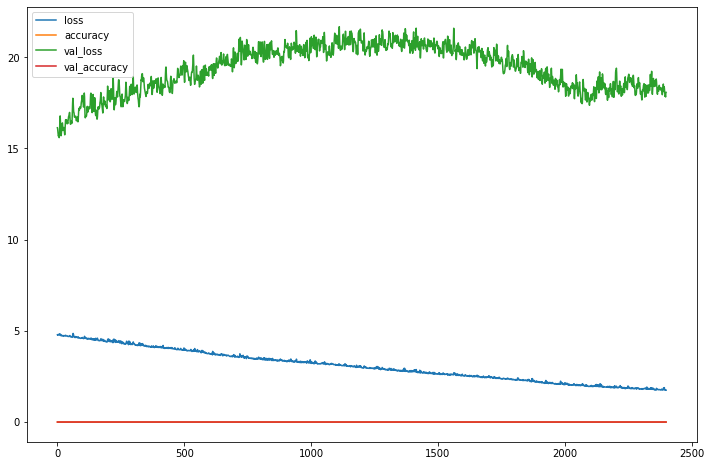

In [119]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [130]:
# Evaluate model with evaluate() method
test_loss, test_acc = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 18.0779 - accuracy: 0.0000e+00


In [136]:
# Accuracy of the model 
print('Test accuracy:', round(test_acc,4))

Test accuracy: 0.0


4/4 [==============================] - 0s 2ms/step
(119, 1)
MAE: 2.7832789188673512
MSE: 18.077890141404257
RMSE: 4.251810219354135
VarScore: 0.7855813165790715


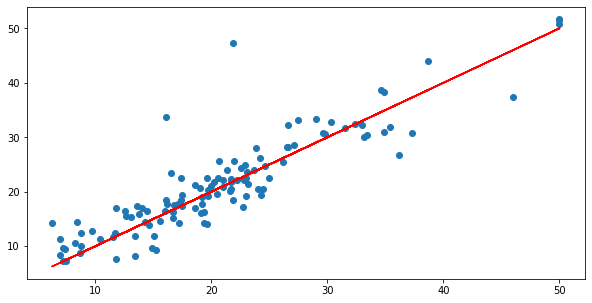

In [137]:
y_pred = model.predict(x_test)
print(y_pred.shape)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')